In [1]:
import pandas as pd
import geopandas 
# prevent false warning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [2]:
from dbconf import get_engine

In [24]:
old_df = pd.read_sql_query(
    "select date, value FROM chc_chirps_rast_baseparam WHERE shape_id = \
    (SELECT id FROM district WHERE name = 'Ilala MC' LIMIT 1)"
    ,con=get_engine())

old_df['date'] = pd.to_datetime(old_df['date'])

<AxesSubplot:xlabel='date'>

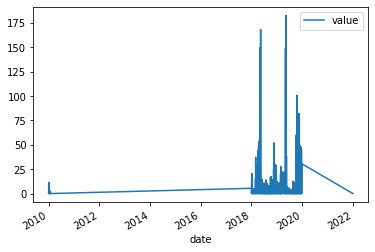

In [25]:
old_df.plot(x='date', y='value')

In [26]:
new_df = pd.read_sql_query(
    "select date, chc_chirps FROM chc_chirps WHERE shape_id = \
    (SELECT id FROM shape WHERE name = 'Ilala MC' LIMIT 1)"
    ,con=get_engine())

new_df['date'] = pd.to_datetime(new_df['date'])

<AxesSubplot:xlabel='date'>

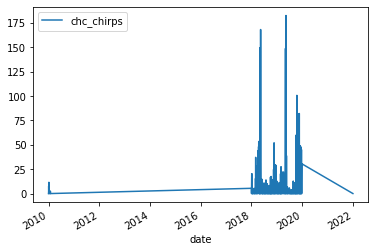

In [27]:
new_df.plot(x='date', y='chc_chirps')